# Youtube Trend Analysis
##### Team Members: Simon, Frank and David

In [41]:
%matplotlib notebook
%matplotlib inline

In [42]:
# Load packages
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import functools as ft
import seaborn as sns
import re  
from scipy.stats import logistic
import calendar
import random
import json

#plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

In [43]:
# Load data 
youtube_data = pd.read_csv('YouTube_Data/US_youtube_trending_data.csv', encoding='utf-8')
lookup = pd.read_csv('YouTube_Data/category_ids.csv')

In [44]:
lookup

,categoryId,category
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [45]:
youtube_data.sort_values(by='trending_date', ascending=True)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
127,6f-jjV5LJoE,Road Rage – Why Motorcycle Riders Smash Windows,2020-08-09T15:00:01Z,UCNSMdQtn1SuFzCZjfK2C7dQ,FortNine,2,2020-08-12T00:00:00Z,motorcycle road rage compilation|motorcycle cr...,342870,30254,580,3124,https://i.ytimg.com/vi/6f-jjV5LJoE/default.jpg,False,False,As the generation that grew up playing Road Ra...
128,QsUfsZzxi9c,"Whatever You Build, I'll Pay For!",2020-08-06T17:00:23Z,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-08-12T00:00:00Z,[None],13073796,1643982,16286,97749,https://i.ytimg.com/vi/QsUfsZzxi9c/default.jpg,False,False,We have a giant area of land and whatever you ...
129,THQH9QJKrIE,"Trump signs executive orders on unemployment, ...",2020-08-08T21:15:00Z,UCHd62-u_v4DvJ8TCFtpi4GA,Washington Post,25,2020-08-12T00:00:00Z,debt|student loans|unemployment aid|cares act|...,523172,6045,1076,5109,https://i.ytimg.com/vi/THQH9QJKrIE/default.jpg,False,False,After negotiations with Democrats in Congress ...
130,xCkpA4_H1x4,UPDATE: CLAN WARS 2 ⚔️ How does it work? TV Ro...,2020-08-08T14:30:05Z,UC_F8DoJf9MZogEOU51TpTbQ,Clash Royale,20,2020-08-12T00:00:00Z,Clash Royale|Clash Royale Game|Supercell|Super...,2635254,73921,2694,3447,https://i.ytimg.com/vi/xCkpA4_H1x4/default.jpg,False,False,Clan Wars 2 is coming. Get ahead of the compet...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,bc5Tg4HMgP4,Rating Halloween Candy with My Best Friends ft...,2020-10-30T19:00:10Z,UC9APf0VQtg1VriRFjk9RfFQ,Chase Hudson,24,2020-11-04T00:00:00Z,chase hudson|lilhuddy|lil huddy|tiktok|tik tok...,5073165,315237,4180,16172,https://i.ytimg.com/vi/bc5Tg4HMgP4/default.jpg,False,False,THANK YOU all so much for watching the video !...
16668,SR3DVWRwslU,"La Luz - Sech, J Balvin (Video Oficial)",2020-11-01T02:15:10Z,UCte53PewI8_jYpBYn071MqQ,Sech,10,2020-11-04T00:00:00Z,Sech|peluche|sechmusic|panama|j balvin|sech y ...,6650780,421132,7787,15779,https://i.ytimg.com/vi/SR3DVWRwslU/default.jpg,False,False,"La Luz - @Sech, @J Balvin (Video Oficial)Escúc..."
16669,1xhahDwbsN8,Nightmare Kitchens | Kitchen Nightmares,2020-10-31T17:00:01Z,UCUZzyuAlhHNP3oiuMjn7RfQ,Kitchen Nightmares,24,2020-11-04T00:00:00Z,Gordon Ramsay kitchen nightmares|Gordon Ramsay...,1436630,36759,449,4109,https://i.ytimg.com/vi/1xhahDwbsN8/default.jpg,False,False,What better way to scare yourself than watch s...
16659,OQwwGnmdcdM,LOOK I'VE GOT SOMETHING TO SAY!!!!,2020-10-31T18:36:12Z,UCGwu0nbY2wSkW8N-cghnLpA,Jaiden Animations,1,2020-11-04T00:00:00Z,jaiden|animations|jaidenanimation|jaidenanimat...,4651242,475391,3640,41310,https://i.ytimg.com/vi/OQwwGnmdcdM/default.jpg,False,False,https://jaidenanimations.com


# Data Cleaning and Exploration
#### Pandas Process

* Parse youtube date format into datetime format
* Calculate lag time for each video to trend
* Replace category ID integers with category names based on youtube category dictionary
* Sort by ‘like’, most to least
* Drop duplicates
* Groupby date, calculate number of trending videos published
* Groupby category calculate number, like %, dislike %
* Groupby month, see if there are trending difference month-to-month (there are not)
* Analyze the lag time for a video to trend

In [46]:
# Function to parse dates (there is probably a built-in function, but this is what I was able to figure out)

def youtube_date_parse(df, series_to_parse, new_name_date, new_name_time, delimiting_character, drop_character):
    try:
        split = df[series_to_parse].str.split(delimiting_character, n = 1, expand = True)
        split[1] =split[1].map(lambda x: x.rstrip(drop_character))
        df[new_name_date] = split[0]
        df[new_name_time] = split[1]
        df.drop(columns = [series_to_parse], inplace=True)
        df[new_name_date] = pd.to_datetime(df[new_name_date])
        return df
    except:
        print('Already parsed, dumbass...')

In [47]:
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [48]:
########### Clean up data: drop columns, parse dates, replace category numbers with cateogry names, etc. #####

# Drop unneeded columns
youtube_data.drop(['video_id','channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'],\
                  axis=1, inplace = True)

# Convert date strings to datetime objects
youtube_date_parse(youtube_data, 'publishedAt', 'date_published', 'time_published', 'T', 'Z')
youtube_date_parse(youtube_data, 'trending_date', 'date_trending', 'time_trending', 'T', 'Z')
youtube_data.drop(['time_trending'], axis=1, inplace=True)

# The datetime functions are great, and can be used to group (see below).
# To make life easier for folks, I'm going to put month names in their own column
# notice the .dt.month syntax that works on datetime objects
youtube_data['month_published']= youtube_data['date_published'].dt.month
youtube_data['month_trending'] = youtube_data['date_trending'].dt.month
youtube_data['month_published'].replace([8,9,10,11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)
youtube_data['month_trending'].replace([8,9,10,11], ['Aug', 'Sept', 'Oct', 'Nov'], inplace=True)

# Calculate lag time between posting and trending.  You can do arithmetic with dates in datetime
youtube_data['lag'] = youtube_data['date_trending'] - youtube_data['date_published']

# Covert category IDs to catetory names
youtube_data['categoryId'].replace(lookup['categoryId'].tolist(), lookup['category'].tolist(), inplace=True)

# Rename columns
new_names = {'channelTitle':'channel', 'categoryId':'category', 'view_count':'views', 'comment_count':'comments'}
youtube_data.rename(columns = new_names, inplace=True)

# Sort by likes
youtube_data.sort_values('likes', ascending=False, inplace=True)


# Reorder columns for readability
new_order = ['channel', 'title', 'category', 'views', 'likes','dislikes','comments', 'date_published', 'date_trending','lag','month_published', 'month_trending', 'time_published','tags', 'description']
youtube_data=youtube_data[new_order]

# Get column names so they are handy
cols = youtube_data.columns

# Keep only the most popular posting of duplicate videos
# I could maybe try to roll the stats for duplicates together,
# but this is tricky, in that they will have different dates.
youtube_data = youtube_data.drop_duplicates(subset='title', keep='first')
youtube_data.head()



,channel,title,category,views,likes,dislikes,comments,date_published,date_trending,lag,month_published,month_trending,time_published,tags,description
3358,Big Hit Labels,BTS (방탄소년단) 'Dynamite' Official MV,Music,232649205,15735533,714194,6065230,2020-08-21,2020-08-28,7 days,Aug,Aug,03:58:10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
4980,BLACKPINK,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,184778248,11795670,879354,2735997,2020-08-28,2020-09-05,8 days,Aug,Sept,04:00:11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
11764,BLACKPINK,BLACKPINK – ‘Lovesick Girls’ M/V,Music,140685439,9217876,127308,1507605,2020-10-02,2020-10-09,7 days,Oct,Oct,04:00:13,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...
2762,Big Hit Labels,BTS (방탄소년단) 'Dynamite' Official Teaser,Music,62496726,6178664,158845,992356,2020-08-18,2020-08-25,7 days,Aug,Aug,15:00:02,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...
3992,Big Hit Labels,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Music,45596902,5951286,97683,382374,2020-08-24,2020-08-31,7 days,Aug,Aug,15:00:01,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...


In [49]:
# manage chinese characters 
# https://stackoverflow.com/questions/48842639/removing-chinese-in-pandas
youtube_data['title'] = youtube_data['title'].apply(lambda row: row.encode('ascii',errors='ignore').decode())
youtube_data['channel'] = youtube_data['channel'].apply(lambda row: row.encode('ascii',errors='ignore').decode())

In [50]:
youtube_data.head()


,channel,title,category,views,likes,dislikes,comments,date_published,date_trending,lag,month_published,month_trending,time_published,tags,description
3358,Big Hit Labels,BTS () 'Dynamite' Official MV,Music,232649205,15735533,714194,6065230,2020-08-21,2020-08-28,7 days,Aug,Aug,03:58:10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
4980,BLACKPINK,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,184778248,11795670,879354,2735997,2020-08-28,2020-09-05,8 days,Aug,Sept,04:00:11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
11764,BLACKPINK,BLACKPINK Lovesick Girls M/V,Music,140685439,9217876,127308,1507605,2020-10-02,2020-10-09,7 days,Oct,Oct,04:00:13,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...
2762,Big Hit Labels,BTS () 'Dynamite' Official Teaser,Music,62496726,6178664,158845,992356,2020-08-18,2020-08-25,7 days,Aug,Aug,15:00:02,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...
3992,Big Hit Labels,BTS () 'Dynamite' Official MV (B-side),Music,45596902,5951286,97683,382374,2020-08-24,2020-08-31,7 days,Aug,Aug,15:00:01,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...


In [51]:
# Sum of videos published (US, 2020) according to category

youtube_data_by_cat = youtube_data.groupby(['category']).sum()
youtube_data_by_cat.reset_index(inplace=True)
youtube_data_by_cat = youtube_data_by_cat.sort_values(by='views', ascending=False)

/var/folders/08/sqgb2bt15_l6kh0_05byp_y00000gn/T/ipykernel_81882/2365720100.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  youtube_data_by_cat = youtube_data.groupby(['category']).sum()


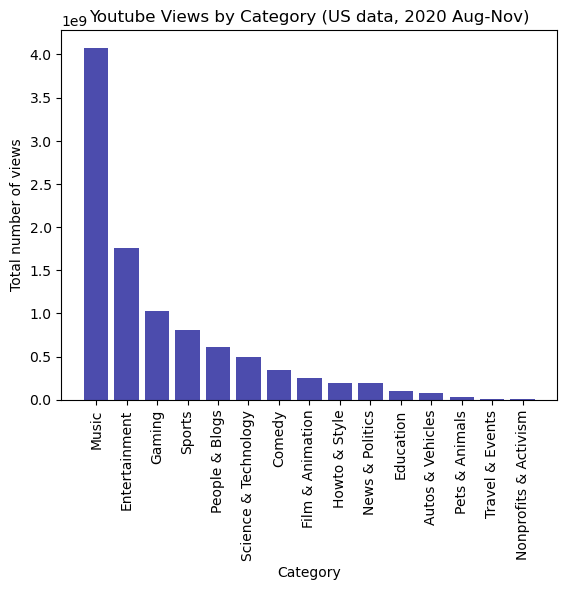

In [52]:
# plot number of views by category

plt.bar(youtube_data_by_cat['category'], youtube_data_by_cat['views'], alpha=0.7, color='darkblue', align='center')
plt.xticks(rotation=90)

plt.xlabel('Category')
plt.ylabel('Total number of views')
plt.title('Youtube Views by Category (US data, 2020 Aug-Nov)')
plt.rcdefaults()
plt.show()

In [53]:
# select only music category data

youtube_data_music_df = youtube_data.loc[youtube_data['category']=='Music']
youtube_data_music_df

,channel,title,category,views,likes,dislikes,comments,date_published,date_trending,lag,month_published,month_trending,time_published,tags,description
3358,Big Hit Labels,BTS () 'Dynamite' Official MV,Music,232649205,15735533,714194,6065230,2020-08-21,2020-08-28,7 days,Aug,Aug,03:58:10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
4980,BLACKPINK,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,184778248,11795670,879354,2735997,2020-08-28,2020-09-05,8 days,Aug,Sept,04:00:11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
11764,BLACKPINK,BLACKPINK Lovesick Girls M/V,Music,140685439,9217876,127308,1507605,2020-10-02,2020-10-09,7 days,Oct,Oct,04:00:13,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...
2762,Big Hit Labels,BTS () 'Dynamite' Official Teaser,Music,62496726,6178664,158845,992356,2020-08-18,2020-08-25,7 days,Aug,Aug,15:00:02,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...
3992,Big Hit Labels,BTS () 'Dynamite' Official MV (B-side),Music,45596902,5951286,97683,382374,2020-08-24,2020-08-31,7 days,Aug,Aug,15:00:01,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,SuperM,SuperM | SuperM Midterm Exam : LUCAS TAEMIN TEN,Music,991767,0,0,5369,2020-09-18,2020-09-21,3 days,Sept,Sept,13:00:01,[None],SuperM's 1st Album Super One will be released ...
1672,SuperM,SuperM '100' MV Reaction,Music,1122081,0,0,8797,2020-08-18,2020-08-20,2 days,Aug,Aug,15:00:17,[None],SuperM's new single “100” is out!🎧Listen and d...
8792,Tyler Childers,A message from Tyler.,Music,716945,0,0,0,2020-09-18,2020-09-24,6 days,Sept,Sept,12:20:09,tyler childers|long violent history|tyler chil...,The new album - Long Violent History - is avai...
9187,THE BOYZ,THE BOYZ() THE STEALER MV,Music,12016894,0,0,30936,2020-09-21,2020-09-26,5 days,Sept,Sept,09:00:03,크래커엔터테인먼트|Cre.ker Entertainment|크래커|Creker|Cre...,THE BOYZ ‘CHASE’ on iTunes : https://apple.co/...


In [54]:
# try to find most popular music videos - sort by number of views (descending)

music_views_descending_popularity = youtube_data_music_df.sort_values(by=['views'], ascending=False)
music_views_descending_popularity.head(50)

,channel,title,category,views,likes,dislikes,comments,date_published,date_trending,lag,month_published,month_trending,time_published,tags,description
3358,Big Hit Labels,BTS () 'Dynamite' Official MV,Music,232649205,15735533,714194,6065230,2020-08-21,2020-08-28,7 days,Aug,Aug,03:58:10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
4980,BLACKPINK,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,184778248,11795670,879354,2735997,2020-08-28,2020-09-05,8 days,Aug,Sept,04:00:11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
11764,BLACKPINK,BLACKPINK Lovesick Girls M/V,Music,140685439,9217876,127308,1507605,2020-10-02,2020-10-09,7 days,Oct,Oct,04:00:13,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...
985,Cardi B,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Music,98442414,3207729,467717,310630,2020-08-07,2020-08-16,9 days,Aug,Aug,04:00:10,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,Cardi B - WAP feat. Megan Thee StallionStream/...
16161,JYP Entertainment,TWICE I CAN'T STOP ME M/V,Music,74991178,2874511,63407,929318,2020-10-26,2020-11-01,6 days,Oct,Nov,08:59:54,TWICE|트와이스|eyeswideopen mv|I cant stop me mv|i...,TWICE I CAN'T STOP ME M/VTWICE 2nd Album Eyes ...
2762,Big Hit Labels,BTS () 'Dynamite' Official Teaser,Music,62496726,6178664,158845,992356,2020-08-18,2020-08-25,7 days,Aug,Aug,15:00:02,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...
13587,JustinBieberVEVO,Justin Bieber - Holy ft. Chance The Rapper,Music,57463872,2731390,71939,194456,2020-09-18,2020-10-18,30 days,Sept,Oct,04:00:10,justin bieber|bieber|justin|hailey|biebs|biebe...,Holy out now: https://JustinBieber.lnk.to/Holy...
13539,SMTOWN,NCT U 'Make A Wish (Birthday Song)' MV,Music,56531571,1901194,28569,493320,2020-10-12,2020-10-18,6 days,Oct,Oct,09:00:15,NCT|NCT U|NCT 127|NCT DREAM|Make a wish|RESONA...,NCT's 2nd album NCT - The 2nd Album RESONANCE ...
15557,ArianaGrandeVevo,Ariana Grande - positions (official video),Music,47606296,3140640,57939,232049,2020-10-23,2020-10-29,6 days,Oct,Oct,04:00:10,ariana grande positions|positions ariana grand...,The official “positions” music video by Ariana...
2787,Ozuna,Ozuna x Karol G x Myke Towers - Caramelo Remix...,Music,45893190,926272,40744,45413,2020-08-17,2020-08-25,8 days,Aug,Aug,20:00:13,Reggaeton music|musica|reggaeton|top reggaeton...,Ozuna x Karol G x Myke Towers - Caramelo Remix...


In [55]:
# most watched videos
# Davids note. OK i satarted looking at music and was going to look at most watched music videos. Its tricky because the same 
# videos come up under different names and channels..

# going to switch to entertainment rather than music to see what I can find out

youtube_data_ent_df = youtube_data.loc[youtube_data['category']=='Entertainment']
youtube_data_ent_df_pop_sorted = youtube_data_ent_df.sort_values(['likes'], ascending = False)
ent_grouped = youtube_data_ent_df_pop_sorted[['channel', 'views', 'title']].groupby(['views']).sum()

ent_grouped_desc = ent_grouped.sort_values(by=['views'], ascending=False)
grouped_ent = ent_grouped_desc.groupby(['channel', 'title', 'views']).sum()
grouped_ent
grouped_ent = grouped_ent.sort_values(by='views', ascending=False)
grouped_ent.head(50)

Empty DataFrame
Columns: []
Index: [(MrBeast, Last To Leave $800,000 Island Keeps It, 31801966), (MrBeast, I Bought A Private Island, 30234876), (MTV, BTS Performs Dynamite | 2020 MTV VMAs, 29442683), (MrBeast, I Gave My 40,000,000th Subscriber 40 Cars, 28567218), (MrBeast, I Filled My Brothers House With Slime & Bought Him A New One, 25904589), (MrBeast, I Survived 24 Hours Straight In Ice, 24446223), (Saturday Night Live, First Debate Cold Open - SNL, 23841894), (MrBeast, I Spent $1,000,000 On Lottery Tickets and WON, 23841821), (Warner Bros. Pictures, Dune Official Trailer, 23316424), (MrBeast, $300,000 Influencer Trivia Tournament!, 22436267), (MrBeast, Hi Me In 5 Years, 21701884), (MrBeast, Why I Havent Been Uploading, 20869977), (MrBeast, Would YOU Rather Have A Lamborghini or This House?, 20807368), (MrBeast, Would You Rather Have A Giant Diamond or $100,000?, 20086518), (James Charles, Giving JoJo Siwa A FULL MAKEOVER!, 19977004), (TREASURE (), TREASURE - 'BOY' M/V, 19682753), (Warner Bros. Pictures, The Batman - DC FanDome Teaser, 19666039), (MrBeast, Get This Random Person 1,000,000 Subscribers, 19422743), (James Charles, Doing My Best Friend's Halloween Makeup ft. Charli, Dixie, Noah, Larray & Chase, 18529000), (MrBeast, I Uberd People And Let Them Keep The Car, 18198753), (MTV, Lady Gaga Performs a Medley of Chromatica II, Rain On Me (ft. Ariana Grande), & More, 17361977), (loonatheworld, [MV]   (LOONA) Why Not?, 14922451), (America's Got Talent, BTS Performs Dynamite on AGT - America's Got Talent 2020, 14032448), (Marvel Entertainment, WandaVision | Official Trailer | Disney+, 13965881), (TREASURE (), TREASURE -  (I LOVE YOU) M/V, 13791519), (Marvel Entertainment, Chadwick Boseman Tribute, 12498164), (James Charles, Doing Kylie Jenner's Halloween Makeup!, 12485363), (Saturday Night Live, VP Fly Debate Cold Open - SNL, 12391394), (MrBeast, Get Him 1,000,000 Subscribers in 24 Hours, 12035592), ( Knowingbros, [ ] (BLACKPINK) 'How You Like That' + 'Pretty Savage'   (Knowing bros) 251, 10558129), (MrBeast, I Uberd People And Gave Them A Lamborghini, 10436587), (Universal Pictures, FREAKY - Official Trailer (HD), 10120969), (James Charles, Makeup en Espaol con Kimberly Loaiza!, 10043340), (HBO Max, Zack Snyders Justice League | Official Teaser | HBO Max, 9880996), (ZHC, Customizing A $10,000,000 House, 9464452), (Saturday Night Live, Final Debate Cold Open - SNL, 9391191), ( ?, (Eng sub) []  !   ! (Hangout with Yoo - refund sisters), 9347686), (James Charles, I Did My Makeup Horribly To See How My Friends Would React *Prank*, 9120314), (Star Wars, The Mandalorian | Season 2 Official Trailer | Disney+, 9118554), (Logan Paul, Opening The $200,000 1st Edition Pokemon Box (Official Live Stream), 8995049), (BLACKPINK, Exclusive footage of BLACKPINK revealed on RELEASED, 8962281), (Netflix, The Devil All The Time starring Tom Holland & Robert Pattinson | Official Trailer | Netflix, 8733381), (James Charles, Emma Chamberlain Picks My Outfits For A Week!, 8714278), (James Charles, I Bought My First Home! 2020 House Tour , 8691732), (STUDIO CHOOM [ ], [BE ORIGINAL] TWICE() 'I CAN'T STOP ME' (4K), 8670886), (ZHC, Surprising The Hype House With A Custom Bus, 8507333), (Saturday Night Live, Dueling Town Halls Cold Open - SNL, 8186822), (James Charles, DMing Celebrities To Pick My Makeup!, 7966976), (James Charles, I Adopted a Child for a Day!, 7751294), (MTV, Doja Cat Performs Say So & Like That | 2020 MTV VMAs, 7597952)]

In [56]:
grouped_ent_channel = grouped_ent.groupby(['channel', 'views'])
grouped_ent_channel_sorted = grouped_ent_channel.sum().sort_values(['views'], ascending=False)
grouped_ent_channel_sorted_top10 = grouped_ent_channel_sorted.head(50)
grouped_ent_channel_sorted_top10.reset_index(inplace=True)
grouped_ent_channel_sorted_top10

,channel,views
0,MrBeast,31801966
1,MrBeast,30234876
2,MTV,29442683
3,MrBeast,28567218
4,MrBeast,25904589
5,MrBeast,24446223
6,Saturday Night Live,23841894
7,MrBeast,23841821
8,Warner Bros. Pictures,23316424
9,MrBeast,22436267


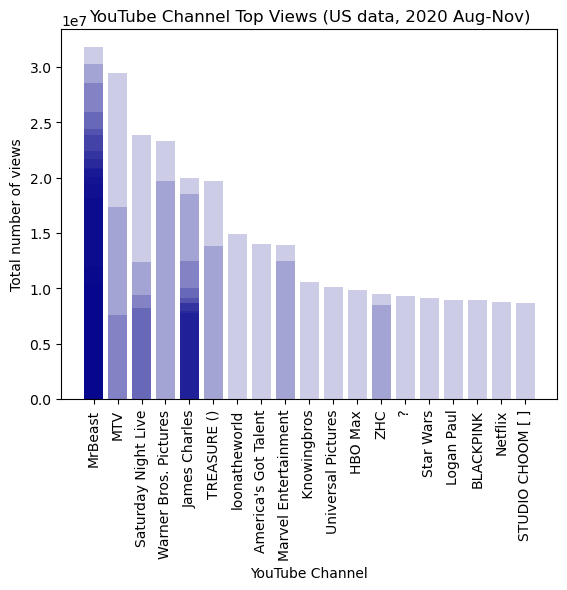

In [57]:
plt.bar(grouped_ent_channel_sorted_top10['channel'], grouped_ent_channel_sorted_top10['views'], alpha=0.2, color='darkblue', align='center')
plt.xticks(rotation=90)

plt.xlabel('YouTube Channel')
plt.ylabel('Total number of views')
plt.title('YouTube Channel Top Views (US data, 2020 Aug-Nov)')
plt.rcdefaults()
#plt.grid(False)
plt.show()

In [127]:
# Examine commonest relevant views for April 2019 (pre-Covid)

# Load data 
youtube_data_2019 = pd.read_csv('YouTube_Data/clean_data_19.csv', encoding='utf-8')
lookup = pd.read_csv('YouTube_Data/category_ids.csv')

In [128]:
youtube_data_2019

,date_published,channelTitle,title,viewCount,likeCount,dislikeCount,commentCount,description
0,2019-04-28,MaTeOWaNnA CoMeDy ReMaStErZ,Mitch Hedberg on Letterman - Stand Up Comedy 2...,28754.0,389,5,44.0,2019 Remaster of Mitch Hedberg on The Late Sho...
1,2019-04-03,Explore Dogs,Senior Dog Gathering Room powered by EXPLORE.org,1418395.0,5002,120,NaN,The gathering room at Old Friends Senior Dog S...
2,2019-04-02,Explore Zen Den,Redwood River Cam powered by EXPLORE.org,273869.0,2165,46,0.0,Watch as the Smith River weaves its way throug...
3,2019-04-08,Explore Birds Bats Bees,Penguin Beach powered by EXPLORE.org,549019.0,871,17,0.0,More than 20 Magellanic penguins live here at ...
4,2019-04-06,RazNitzanMusic,Vocal Trance Radio | Uplifting · 24/7 Live Stream,4856917.0,33914,1349,NaN,The music on our 24/7 Live Stream is also avai...
5,2019-04-09,Explore Africa,Africam Naledi Cat-EYE powered by EXPLORE.org,2646960.0,12008,786,0.0,Watch Africam Naledi Cat-EYE - LIVE This camer...
6,2019-04-21,AYQOUNA,موقعة أنوال | قصة المعركة التي سحق فيها المغار...,20310.0,605,15,108.0,قصة معركة أنوال التي سحقت فيها المقاومة الريفي...
7,2019-04-10,Masteer Recipes,Crispy Chinese Starter | कोबी मन्चुरिअन | Veg ...,221657.0,3195,176,257.0,gobhimanchurian #chineserecipe #masteerrecipes...
8,2019-04-29,Masteer Recipes,चटकदार आंबट गोड तिखट कैरीची कढी | Kairichi Aam...,237341.0,4175,237,0.0,curryrecipes #rawmango #masteerrecipes आपल्या ...
9,2019-04-03,Explore Cats Lions Tigers,Windsong Memorial Cat Hospital - Big Cat Rescu...,117500.0,548,17,0.0,Sometimes the rescued animals at Big Cat Rescu...


In [129]:
youtube_data_2019_sorted = youtube_data_2019.sort_values(by='viewCount', ascending=False)
youtube_data_2019_sorted

,date_published,channelTitle,title,viewCount,likeCount,dislikeCount,commentCount,description
48,2019-04-21,Duniya Today,Haye Mera Dil | DJ Remix || Full Vibration DJ ...,7161262.0,29091,2045,455.0,HayeMeraDil #YoYoHoneySingh #LoveSedHeartTochi...
24,2019-04-06,Soggy Dollar,"Soggy Dollar Bar Live Webcam - Jost Van Dyke, ...",5363254.0,12556,772,0.0,"White Bay, Jost Van Dyke in the British Virgin..."
4,2019-04-06,RazNitzanMusic,Vocal Trance Radio | Uplifting · 24/7 Live Stream,4856917.0,33914,1349,NaN,The music on our 24/7 Live Stream is also avai...
18,2019-04-15,WebCamNL,WebCam.NL | www.amsterdam-dam.com - live ultra...,4745216.0,17101,1302,NaN,www.amsterdam-dam.com - live ultraHD PTZ camer...
33,2019-04-17,Nat and Essie,Super Monster Lobo Eats Something Bad and Has ...,3859176.0,10439,3401,NaN,Super Monster Lobo Eats Something Bad and Has ...
27,2019-04-19,Nat and Essie,Nat and Essie Unbox TOY STORY 4 Mashems Squish...,2931694.0,12802,3180,NaN,TOY STORY 4 Mashems Squishy TOY Surprise Capsu...
5,2019-04-09,Explore Africa,Africam Naledi Cat-EYE powered by EXPLORE.org,2646960.0,12008,786,0.0,Watch Africam Naledi Cat-EYE - LIVE This camer...
12,2019-04-09,afartv,🌎 Hawaii Humpback Whale Marine Sanctuary @ Mau...,2584629.0,19539,494,0.0,Your help is needed! Please help keep this web...
46,2019-04-27,Nat and Essie,Unboxing Cry Babies Mini Magic Tears Dolls,2436341.0,9852,3485,NaN,Cry Babies Mini Magic Tears - Cutest Dolls For...
34,2019-04-09,Nat and Essie Too,Paw Patrol Lollipop POP UPS Candy Dispensers,2410380.0,11215,3727,17.0,Paw Patrol Lollipop POP UPS Candy Dispensers #...


In [130]:
grouped_2019_channel

In [61]:
grouped_2019_channel = youtube_data_2019_sorted.groupby(['channelTitle', 'viewCount'])
grouped_2019_channel_sorted = grouped_2019_channel.sum().sort_values(['viewCount'], ascending=False)

grouped_2019_channel_sorted.reset_index(inplace=True)
grouped_2019_channel_sorted_top = grouped_2019_channel_sorted.iloc[:20]

grouped_2019_channel_sorted_top


/var/folders/08/sqgb2bt15_l6kh0_05byp_y00000gn/T/ipykernel_81882/2063838646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_2019_channel_sorted = grouped_2019_channel.sum().sort_values(['viewCount'], ascending=False)


,channelTitle,viewCount,likeCount,dislikeCount,commentCount
0,Duniya Today,7161262.0,29091,2045,455.0
1,Soggy Dollar,5363254.0,12556,772,0.0
2,RazNitzanMusic,4856917.0,33914,1349,0.0
3,WebCamNL,4745216.0,17101,1302,0.0
4,Nat and Essie,3859176.0,10439,3401,0.0
5,Nat and Essie,2931694.0,12802,3180,0.0
6,Explore Africa,2646960.0,12008,786,0.0
7,afartv,2584629.0,19539,494,0.0
8,Nat and Essie,2436341.0,9852,3485,0.0
9,Nat and Essie Too,2410380.0,11215,3727,17.0


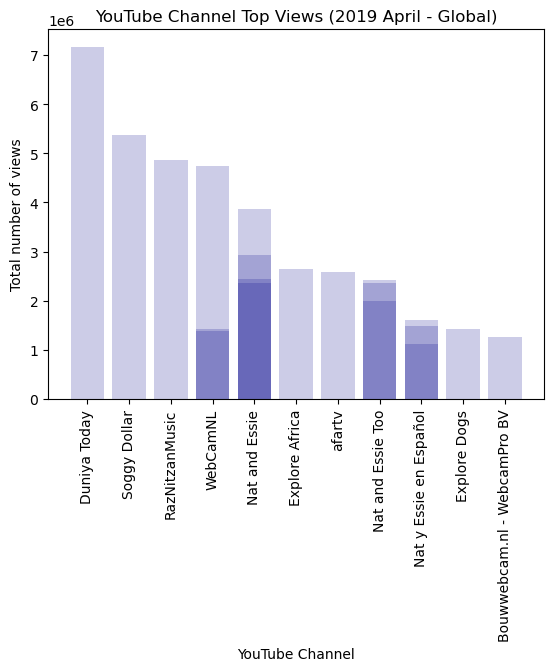

In [62]:
plt.bar(grouped_2019_channel_sorted_top['channelTitle'], grouped_2019_channel_sorted_top['viewCount'], alpha=0.2, color='darkblue', align='center')
plt.xticks(rotation=90)

plt.xlabel('YouTube Channel')
plt.ylabel('Total number of views')
plt.title('YouTube Channel Top Views (2019 April - Global)')
plt.rcdefaults()
#plt.grid(False)
plt.show()

In [63]:
# Examine commonest relevant views for April 2020 (in-Covid)

# Load data 
youtube_data_2020 = pd.read_csv('YouTube_Data/clean_data_20.csv', encoding='utf-8')
lookup = pd.read_csv('YouTube_Data/category_ids.csv')

In [64]:
youtube_data_2020

,date_published,channelTitle,title,viewCount,likeCount,dislikeCount,commentCount,description
0,2019-04-20,Chris Venegas,SCHOOL DARES😂 | High School Edition |,4169382.0,112362,2895,3293.0,Watch My Ads So I Can Buy A House .. FOLLOW ...
1,2019-04-28,Mina JuVy,Q&amp;A//Meme | Gacha Life (Mina JuVy),128735.0,3568,76,972.0,Link Facebook của mị: https://www.facebook.com...
2,2019-04-08,Explore Birds Bats Bees,Penguin Beach powered by EXPLORE.org,548996.0,871,17,0.0,More than 20 Magellanic penguins live here at ...
3,2019-04-06,RazNitzanMusic,Vocal Trance Radio | Uplifting · 24/7 Live Stream,4854919.0,33899,1347,NaN,The music on our 24/7 Live Stream is also avai...
4,2019-04-25,Explore Birds Bats Bees,The Mixed Species Flying Fox cam powered by E...,231865.0,821,14,0.0,These rescued fruit bats are just hanging out!...
5,2019-04-10,Masteer Recipes,Crispy Chinese Starter | कोबी मन्चुरिअन | Veg ...,221656.0,3195,176,257.0,gobhimanchurian #chineserecipe #masteerrecipes...
6,2019-04-18,Live Radio Music,Best Radio 1 • Live Radio Pop Music 2020&#39; ...,30446436.0,168896,10640,0.0,Best Radio 1 • Live Radio Pop Music 2020' Best...
7,2019-04-03,ponycanyon,LIVE 道後温泉本館！！冠山カメラ,806293.0,2527,121,NaN,日本初！道後温泉本館は重要文化財の公衆浴場を営業しながら保存修理工事中。 手塚治虫がライフワ...
8,2019-04-09,afartv,🌎 Hawaii Humpback Whale Marine Sanctuary @ Mau...,2584326.0,19536,494,0.0,Your help is needed! Please help keep this web...
9,2019-04-05,RuPaul's Drag Race,The Draglympics,NaN,128,9,NaN,The queens get physical in the 69th Internatio...


In [65]:
youtube_data_2020_sorted = youtube_data_2020.sort_values(by='viewCount', ascending=False)
youtube_data_2020_sorted

,date_published,channelTitle,title,viewCount,likeCount,dislikeCount,commentCount,description
6,2019-04-18,Live Radio Music,Best Radio 1 • Live Radio Pop Music 2020&#39; ...,30446436.0,168896,10640,0.0,Best Radio 1 • Live Radio Pop Music 2020' Best...
33,2019-04-18,Dj starik,Cheb Rami Meryoula w rani Kabal avec Houari Gh...,19011408.0,84007,8191,4217.0,Live djawhara dj starik abonnez vous https://w...
48,2019-04-21,Duniya Today,Haye Mera Dil | DJ Remix || Full Vibration DJ ...,7161045.0,29089,2045,455.0,HayeMeraDil #YoYoHoneySingh #LoveSedHeartTochi...
3,2019-04-06,RazNitzanMusic,Vocal Trance Radio | Uplifting · 24/7 Live Stream,4854919.0,33899,1347,NaN,The music on our 24/7 Live Stream is also avai...
14,2019-04-15,WebCamNL,WebCam.NL | www.amsterdam-dam.com - live ultra...,4745009.0,17101,1302,NaN,www.amsterdam-dam.com - live ultraHD PTZ camer...
0,2019-04-20,Chris Venegas,SCHOOL DARES😂 | High School Edition |,4169382.0,112362,2895,3293.0,Watch My Ads So I Can Buy A House .. FOLLOW ...
21,2019-04-13,The Dark Joker,مهازل أصحاب السياسة في الجزائر,2954708.0,12293,2688,1575.0,مهازل أصحاب السياسة في الجزائر شكرا على المشاهدة.
8,2019-04-09,afartv,🌎 Hawaii Humpback Whale Marine Sanctuary @ Mau...,2584326.0,19536,494,0.0,Your help is needed! Please help keep this web...
36,2019-04-09,Nat and Essie Too,Paw Patrol Lollipop POP UPS Candy Dispensers,2403419.0,11205,3722,17.0,Paw Patrol Lollipop POP UPS Candy Dispensers #...
47,2019-04-04,Nat and Essie Too,Paw Patrol Puppy Pretend Play Music Carry Case...,2020162.0,7560,3250,33.0,NEW! Puppy Music Carry Cases & Toy Surprises w...


In [66]:
grouped_2020_channel = youtube_data_2020_sorted.groupby(['channelTitle', 'viewCount'])
grouped_2020_channel_sorted = grouped_2020_channel.sum().sort_values(['viewCount'], ascending=False)
grouped_2020_channel_sorted.reset_index(inplace=True)
grouped_2020_channel_sorted_top = grouped_2020_channel_sorted.iloc[:20]
grouped_2020_channel_sorted_top


/var/folders/08/sqgb2bt15_l6kh0_05byp_y00000gn/T/ipykernel_81882/2918545993.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_2020_channel_sorted = grouped_2020_channel.sum().sort_values(['viewCount'], ascending=False)


,channelTitle,viewCount,likeCount,dislikeCount,commentCount
0,Live Radio Music,30446436.0,168896,10640,0.0
1,Dj starik,19011408.0,84007,8191,4217.0
2,Duniya Today,7161045.0,29089,2045,455.0
3,RazNitzanMusic,4854919.0,33899,1347,0.0
4,WebCamNL,4745009.0,17101,1302,0.0
5,Chris Venegas,4169382.0,112362,2895,3293.0
6,The Dark Joker,2954708.0,12293,2688,1575.0
7,afartv,2584326.0,19536,494,0.0
8,Nat and Essie Too,2403419.0,11205,3722,17.0
9,Nat and Essie Too,2020162.0,7560,3250,33.0


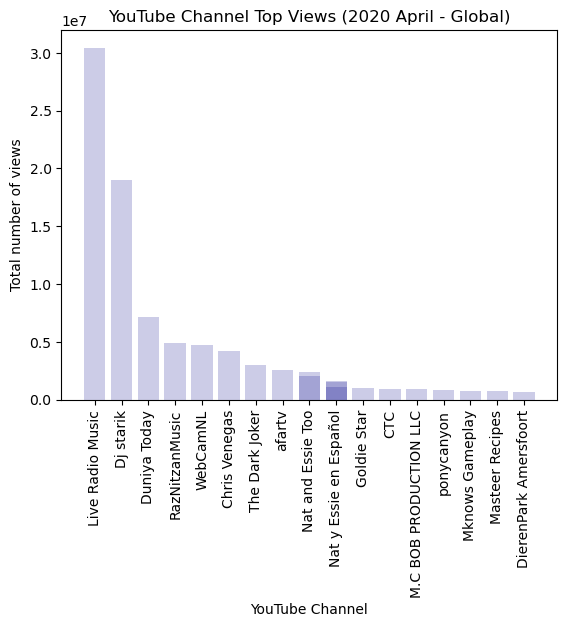

In [67]:
plt.bar(grouped_2020_channel_sorted_top['channelTitle'], grouped_2020_channel_sorted_top['viewCount'], alpha=0.2, color='darkblue', align='center')
plt.xticks(rotation=90)

plt.xlabel('YouTube Channel')
plt.ylabel('Total number of views')
plt.title('YouTube Channel Top Views (2020 April - Global)')
plt.rcdefaults()
#plt.grid(False)
plt.show()

In [68]:
# Examine commonest relevant views for April 2020 (in-Covid)

# Load data 
youtube_data_qc = pd.read_csv('YouTube_Data/clean_data_qc.csv', encoding='utf-8')
lookup = pd.read_csv('YouTube_Data/category_ids.csv')

In [69]:
youtube_data_qc

,date_published,channelTitle,channelViewCount,subscriberCount,videoCount,VideoTitle,VideoViewCount,likeCount,dislikeCount,commentCount,description
0,2020-05-22,Diamond Platnumz,52113963,656000,30,"Quarantine - Wasafi Feat Diamond Platnumz, Ray...",13275640,135419,12135,14390.0,Do You Think Your Quarantine Moves Are Better ...
1,2020-04-28,Chloe Ting,2066678724,4330000,28407,Get SNATCHED during Quarantine | Before After ...,5561270,202201,1293,8239.0,Here are some before after transformation jour...
2,2020-04-28,Trinity and Beyond,80346079,378000,100,Hello Neighbor Steals Our Quarantine Games!!! ...,4031644,41971,3800,NaN,Hello Neighbor in Real Life Steals Our Play at...
3,2020-03-25,SNOWTHAPRODUCT,79543896,966000,295,Snow Tha Product - NoWhere To Go (QUARANTINE L...,2731237,82417,1639,10731.0,Since everyone is quarantined in the house bec...
4,2020-04-16,Renz Lesaca,2423976543,4530000,17673,30 Days HOME QUARANTINE push-ups challenge epi...,2722330,34652,1684,1391.0,"Hi there, im Renz lesaca Because of the corona..."
5,2020-04-04,The Bee Family,12635764,365000,26,FORTNITE DANCE CHALLENGE IN REAL LIFE!! - Quar...,2435916,52115,5280,3196.0,Bringing back the Fortnite Dance Challenge to ...
6,2020-03-21,Walker Bryant,172604620,1200000,94,LAST TO Leave The Self Quarantine WINS w/ My C...,2273513,51593,1558,NaN,"Hey guys its Walker Bryant, also known as Pipe..."
7,2020-04-11,Viralbollywood,65880867,836000,58,Jannat Zubair and Ayaan Zubair FUNNIEST and CU...,2241838,27974,1896,407.0,WATCH Jannat Zubair and Ayaan Zubair FUNNIEST ...
8,2020-03-25,W2SPlays,59366405,598000,101,194 RATED FUT DRAFT QUARANTINE CHALLENGE - FIF...,2133533,62198,2386,2454.0,W2S 194 RATED FUT DRAFT CHALLENGE My Instagram...
9,2020-03-30,Good Mythical Morning,8637552,102000,129,Nasty Condiment War Challenge (Quarantine Epis...,1845078,69947,588,3966.0,In this first ever remote episode of Good Myth...


In [70]:
youtube_data_qc_sorted = youtube_data_qc.sort_values(by='VideoViewCount', ascending=False)
youtube_data_qc_sorted

,date_published,channelTitle,channelViewCount,subscriberCount,videoCount,VideoTitle,VideoViewCount,likeCount,dislikeCount,commentCount,description
0,2020-05-22,Diamond Platnumz,52113963,656000,30,"Quarantine - Wasafi Feat Diamond Platnumz, Ray...",13275640,135419,12135,14390.0,Do You Think Your Quarantine Moves Are Better ...
1,2020-04-28,Chloe Ting,2066678724,4330000,28407,Get SNATCHED during Quarantine | Before After ...,5561270,202201,1293,8239.0,Here are some before after transformation jour...
2,2020-04-28,Trinity and Beyond,80346079,378000,100,Hello Neighbor Steals Our Quarantine Games!!! ...,4031644,41971,3800,NaN,Hello Neighbor in Real Life Steals Our Play at...
3,2020-03-25,SNOWTHAPRODUCT,79543896,966000,295,Snow Tha Product - NoWhere To Go (QUARANTINE L...,2731237,82417,1639,10731.0,Since everyone is quarantined in the house bec...
4,2020-04-16,Renz Lesaca,2423976543,4530000,17673,30 Days HOME QUARANTINE push-ups challenge epi...,2722330,34652,1684,1391.0,"Hi there, im Renz lesaca Because of the corona..."
5,2020-04-04,The Bee Family,12635764,365000,26,FORTNITE DANCE CHALLENGE IN REAL LIFE!! - Quar...,2435916,52115,5280,3196.0,Bringing back the Fortnite Dance Challenge to ...
6,2020-03-21,Walker Bryant,172604620,1200000,94,LAST TO Leave The Self Quarantine WINS w/ My C...,2273513,51593,1558,NaN,"Hey guys its Walker Bryant, also known as Pipe..."
7,2020-04-11,Viralbollywood,65880867,836000,58,Jannat Zubair and Ayaan Zubair FUNNIEST and CU...,2241838,27974,1896,407.0,WATCH Jannat Zubair and Ayaan Zubair FUNNIEST ...
8,2020-03-25,W2SPlays,59366405,598000,101,194 RATED FUT DRAFT QUARANTINE CHALLENGE - FIF...,2133533,62198,2386,2454.0,W2S 194 RATED FUT DRAFT CHALLENGE My Instagram...
9,2020-03-30,Good Mythical Morning,8637552,102000,129,Nasty Condiment War Challenge (Quarantine Epis...,1845078,69947,588,3966.0,In this first ever remote episode of Good Myth...


In [71]:
grouped_qc_channel = youtube_data_qc_sorted.groupby(['channelTitle', 'VideoViewCount'])
grouped_qc_channel_sorted = grouped_qc_channel.sum().sort_values(['VideoViewCount'], ascending=False)
grouped_qc_channel_sorted.reset_index(inplace=True)
grouped_qc_channel_sorted_top = grouped_qc_channel_sorted.iloc[:20]
grouped_qc_channel_sorted_top


/var/folders/08/sqgb2bt15_l6kh0_05byp_y00000gn/T/ipykernel_81882/3015908765.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_qc_channel_sorted = grouped_qc_channel.sum().sort_values(['VideoViewCount'], ascending=False)


,channelTitle,VideoViewCount,channelViewCount,subscriberCount,videoCount,likeCount,dislikeCount,commentCount
0,Diamond Platnumz,13275640,52113963,656000,30,135419,12135,14390.0
1,Chloe Ting,5561270,2066678724,4330000,28407,202201,1293,8239.0
2,Trinity and Beyond,4031644,80346079,378000,100,41971,3800,0.0
3,SNOWTHAPRODUCT,2731237,79543896,966000,295,82417,1639,10731.0
4,Renz Lesaca,2722330,2423976543,4530000,17673,34652,1684,1391.0
5,The Bee Family,2435916,12635764,365000,26,52115,5280,3196.0
6,Walker Bryant,2273513,172604620,1200000,94,51593,1558,0.0
7,Viralbollywood,2241838,65880867,836000,58,27974,1896,407.0
8,W2SPlays,2133533,59366405,598000,101,62198,2386,2454.0
9,Good Mythical Morning,1845078,8637552,102000,129,69947,588,3966.0


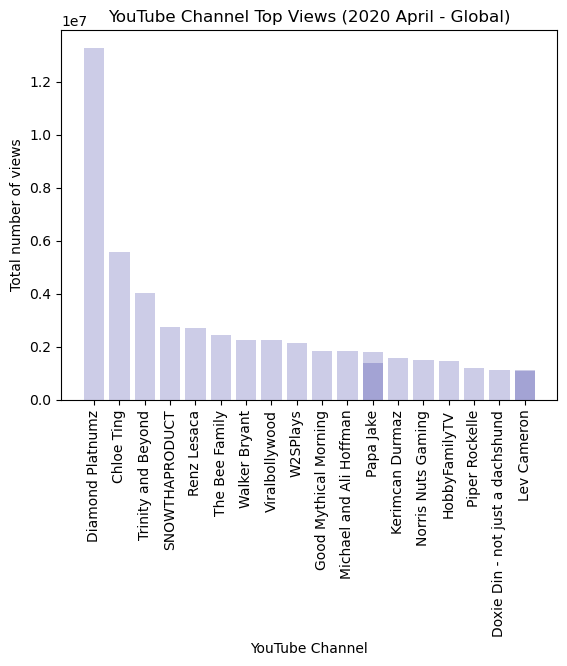

In [72]:
plt.bar(grouped_qc_channel_sorted_top['channelTitle'], grouped_qc_channel_sorted_top['VideoViewCount'], alpha=0.2, color='darkblue', align='center')
plt.xticks(rotation=90)

plt.xlabel('YouTube Channel')
plt.ylabel('Total number of views')
plt.title('YouTube Channel Top Views (2020 April - Global)')
plt.rcdefaults()
#plt.grid(False)
plt.show()

In [76]:
# Dependencies
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import os 
import wordcloud
import requests
from scipy import stats
from config import api_key
import googleapiclient.errors
import matplotlib as mpl
from cycler import cycler
import googleapiclient.discovery
from youtube_api import YoutubeDataApi
from googleapiclient.discovery import build


ImportError: cannot import name 'YoutubeDataApi' from 'youtube_api' (/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/youtube_api/__init__.py)

In [75]:
#lookthrough youtube api and get top 50 relevant videos published between in April 2019
youtube = build("youtube", "v3", developerKey=api_key)
#set api_run_stop False to call the API/ True to skip the API
api_run_stop = True
if not api_run_stop:
    top50 = youtube.search().list(part=["snippet", "id"], 
                                  type="video", 
                                  publishedAfter="2019-04-01T00:00:00Z", 
                                  publishedBefore="2019-04-30T00:00:00Z", 
                                  videoDuration="any", 
                                  order="relevance", maxResults=50)
    top50= top50.execute()
#df_top50 is stored in SEARCH_DATA.json so no need to run the api everytime (solves the issue of running out of search quata)
    df_top50 = pd.DataFrame(top50['items'])
    df_top50.to_json('API_Search_Data/SEARCH_DATA_2019.json')
    top50_df_2019=pd.DataFrame(pd.read_json('API_Search_Data/SEARCH_DATA_2019.json'))
#print(json.dumps(top50, indent=4, sort_keys=True))

NameError: name 'build' is not defined